# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
!pip install nb-black

In [2]:
# Make code formatting clean
%load_ext nb_black

# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To calculate variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [3]:
# Import the dataset
df = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


<IPython.core.display.Javascript object>

In [5]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

#### Observations:

Data Cleaning
- The following are basically small category lists that can be converted into dummy columns: os, 4g, 5g
- brand_name is also a category list that could potentially get dummy variables, but there are 34 unique brands so that is a lot. It is potentially worth removing the variable altogether to make the model simple.
- The following have null values that should get handled: main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight
- Even though release_year is a numerical value, it may be more valuable to convert this into a "years since release" numerical variable so that the value is more proportional.
- Other than release_year and ram, all numerical columns are already ints or floats, so we don't need to do data type conversions or removing symbols in strings
- In the grand scheme of things, there aren't many missing values. We should still be able to obtain valuable conclusions from this data. Most likely we can treat the missing values by filling them in with medians.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

##### 1. What does the distribution of normalized used device prices look like?

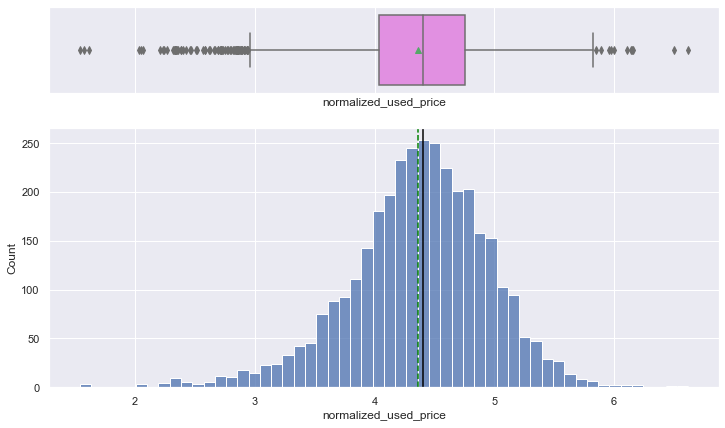

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(df, "normalized_used_price")

The normalized used price generally follows a normal distribution with a slight left skew. The middle quartile of the devices fall between about 4 and 4.75 euros.

Let's also look at the distribution of normalized new prices.

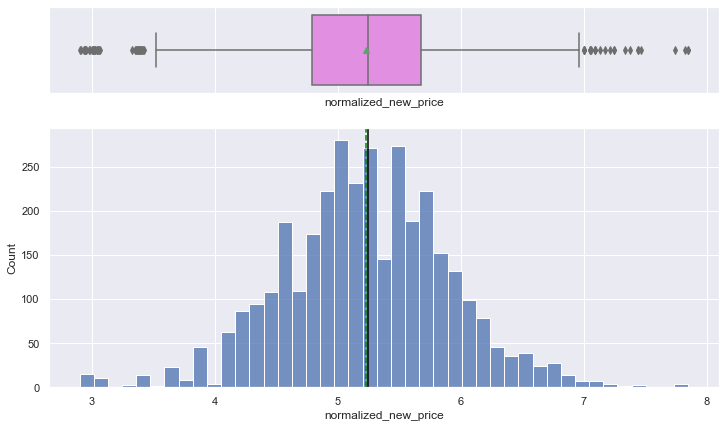

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "normalized_new_price")

The normalized new price has a more normal distribution, as the mean is almost the same as the median. There are a couple outliers, but the middle quartile of the devices fall between about 4.8 and 5.7 euros.

##### 2. What percentage of the used device market is dominated by Android devices?

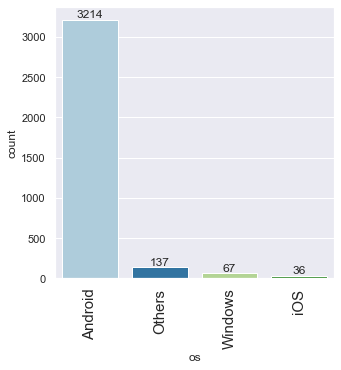

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(df, "os")

In [13]:
percent_Android = round(df[df["os"] == "Android"].shape[0] / df.shape[0] * 100, 2)
print(
    "The percentage of the used device market dominated by Android devices is "
    + str(percent_Android)
    + "%."
)

The percentage of the used device market dominated by Android devices is 93.05%.


<IPython.core.display.Javascript object>

##### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

<AxesSubplot:xlabel='Count', ylabel='os'>

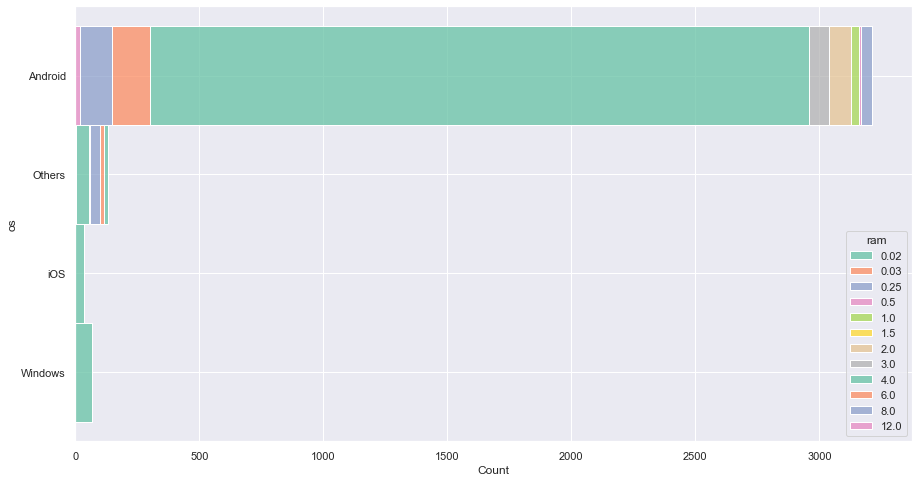

<IPython.core.display.Javascript object>

In [14]:
# While RAM is a numerical value, they typically only exist at certain values. 
# It may make sense to just treat RAM as a categorical variable.

plt.figure(figsize = (15,8))
sns.histplot(data=df, y="os", hue="ram", multiple="stack", palette="Set2")


<AxesSubplot:xlabel='Count', ylabel='os'>

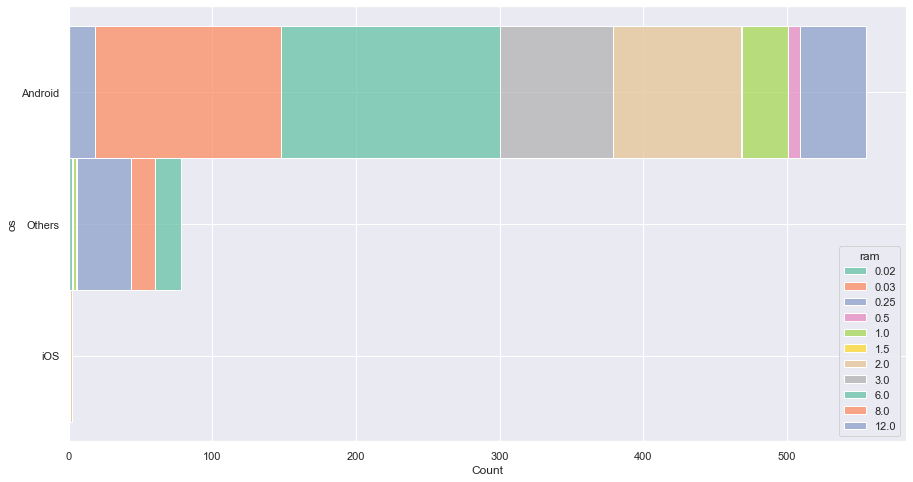

<IPython.core.display.Javascript object>

In [15]:
# It's clear that RAM=4.0GB takes up the most across all brands.
# Now let's see if we can get more information by removing the RAM=4.0GB option.

plt.figure(figsize=(15, 8))
sns.histplot(
    data=df[df["ram"] != 4.0], y="os", hue="ram", multiple="stack", palette="Set2"
)

4.0 GB is the most popular RAM across all brands.
6.0 GB and 8.0 GB are the most popular RAMs for Android.
12.0 GB is the most popular RAM for other brands.

##### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery', ylabel='weight'>

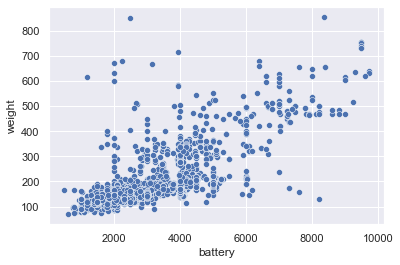

<IPython.core.display.Javascript object>

In [16]:
sns.scatterplot(df["battery"], df["weight"])

In [17]:
df[["battery", "weight"]].corr()

,battery,weight
battery,1.000000,0.703388
weight,0.703388,1.000000


<IPython.core.display.Javascript object>

Generally, increasing the battery increases weight of the device. There is a positive correlation between the two variables.

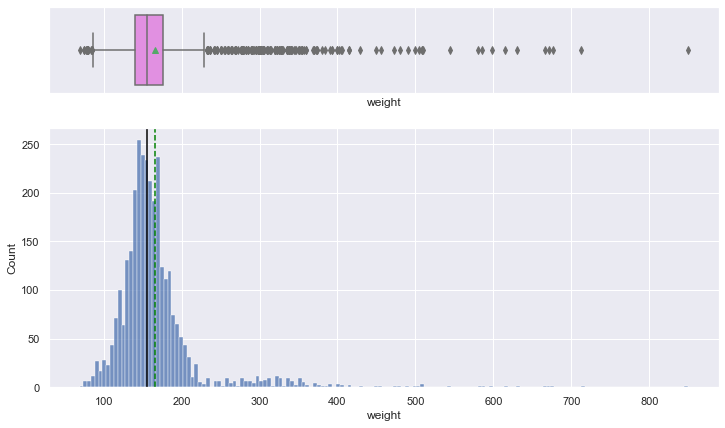

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df[df["battery"] <= 4500], "weight")

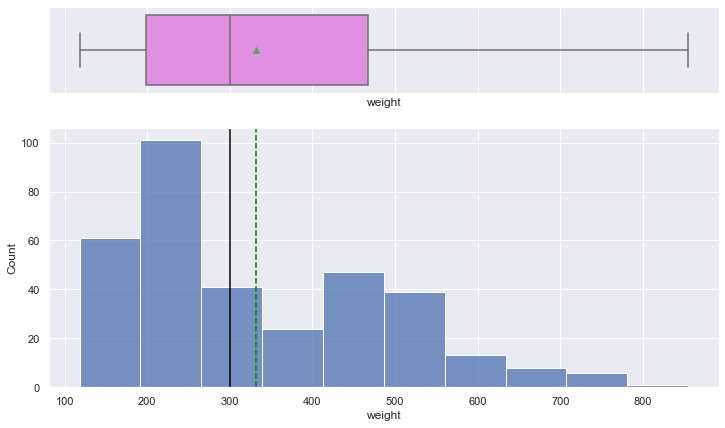

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df[df["battery"] > 4500], "weight")

There are many outliers where a device with a small battery has a weight larger than 225 grams. But, it is relatively normal for devices with a large battery to have a weight up to 700 grams. 

##### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

<AxesSubplot:xlabel='brand_name', ylabel='Count'>

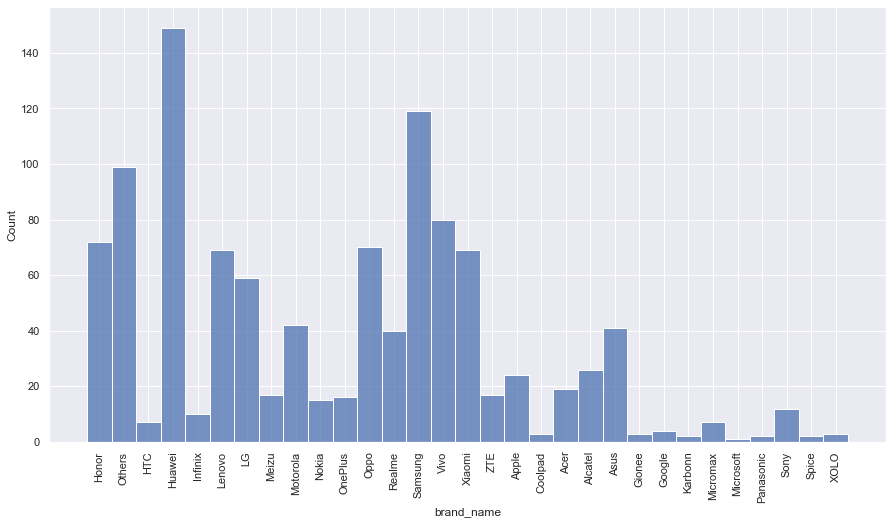

<IPython.core.display.Javascript object>

In [20]:
# The data for screen size is given in cm, but the prompt asks for inches.
# There are 2.54 cm in one 1 inch, so we can use this calculation.
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.histplot(data=df[df["screen_size"] > 6 * 2.54], x="brand_name")

A couple brands have many options for devices with screen size greater than 6 inches, such as: Huawei, Samsung, Vivo, Xiaomi, Honor, Oppo, Lenovo.
A couple brands don't have many options, such as: Microsoft, Panasonic, Spice, XOLO, Karbonn, Gionee, Google, HTC, Micromax.

##### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

<AxesSubplot:xlabel='brand_name', ylabel='Count'>

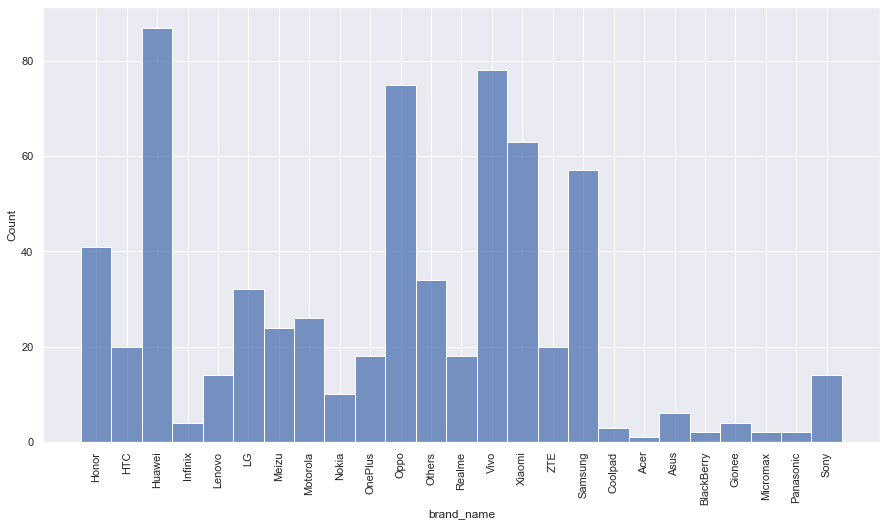

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.histplot(data=df[df["selfie_camera_mp"] > 8], x="brand_name")

A couple brands have many options for devices with selfie camera greater than 8MP, such as: Huawei, Vivo, Oppo, Xiaomi, Samsung.
A couple brands don't have many options, such as: Acer, BlackBerry, Micromax, Panasonic, Infinix.

##### 7. Which attributes are highly correlated with the normalized price of a used device?

<AxesSubplot:>

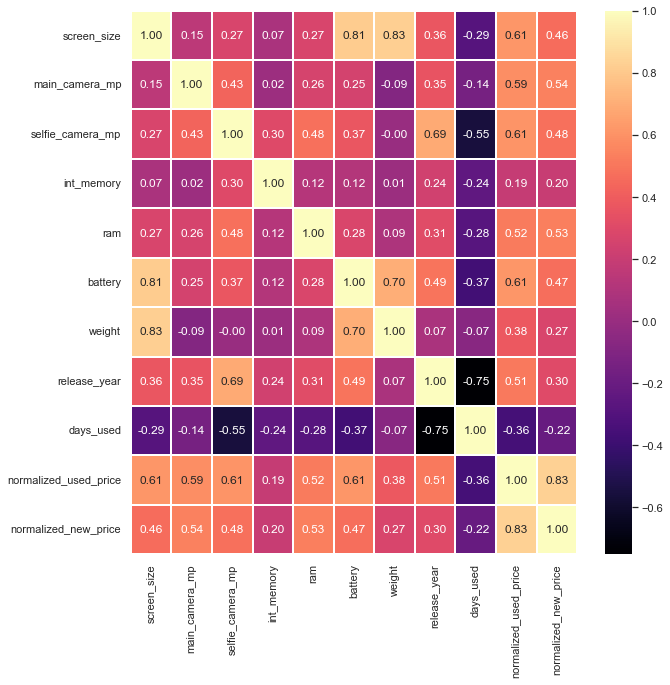

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt=".2f", cmap="magma")

Normalized used price is highly correlated with normalized new price (obviously).

Normalized used price is correlated with screen size, selfie camera MP, and battery.

#### Additional questions I would like to answer:

##### Has the price of a device increased over time?

<AxesSubplot:xlabel='release_year', ylabel='normalized_new_price'>

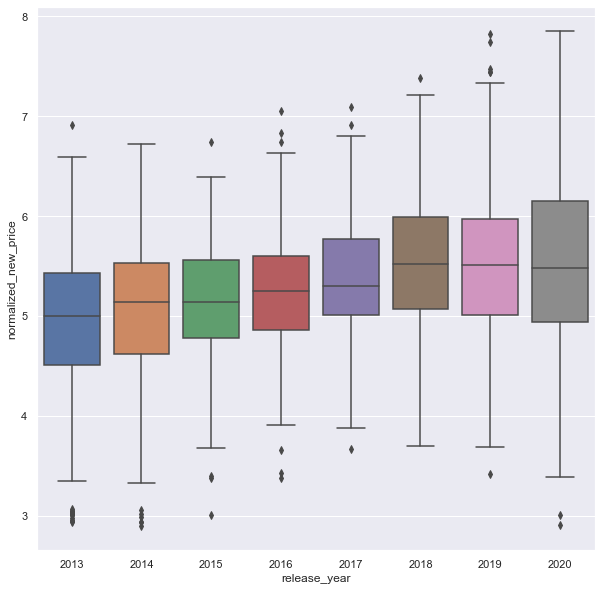

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x="release_year", y="normalized_new_price")

<AxesSubplot:xlabel='release_year', ylabel='normalized_used_price'>

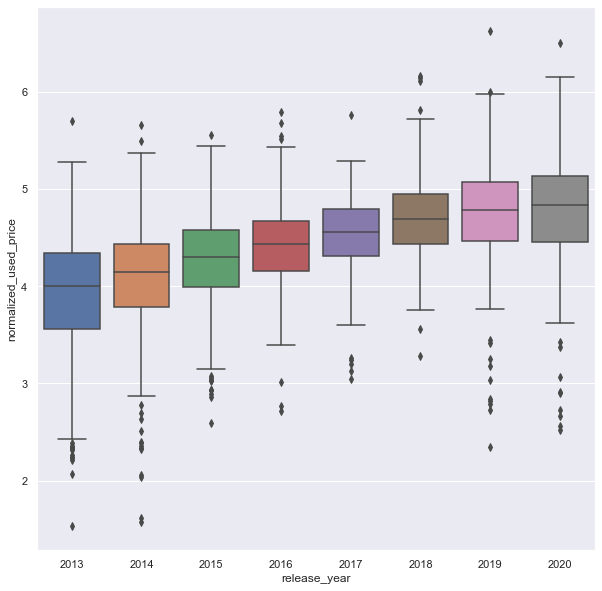

<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x="release_year", y="normalized_used_price")

There appears to be a general increase in price as the release year is more recent.

##### Does increasing screen size also increase the weight of the device?

C:\Users\prani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='screen_size', ylabel='weight'>

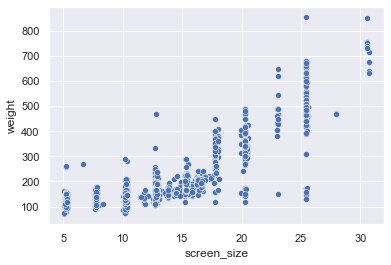

<IPython.core.display.Javascript object>

In [25]:
sns.scatterplot(df["screen_size"], df["weight"])

In [26]:
df[["screen_size", "weight"]].corr()

,screen_size,weight
screen_size,1.00000,0.82889
weight,0.82889,1.00000


<IPython.core.display.Javascript object>

Screen size seems to have a high correlation with weight.

##### Is there a phone that is both 4g and 5g? (This will be helpful to understand how to clean up these columns.)

In [27]:
df[(df["4g"] == "yes") & (df["5g"] == "yes")].shape

(152, 15)

<IPython.core.display.Javascript object>

Yes, there are rows that are both 4g and 5g. We should keep these as separate columns.

##### Does increased memory lead to an increase in price?

<AxesSubplot:xlabel='int_memory', ylabel='normalized_used_price'>

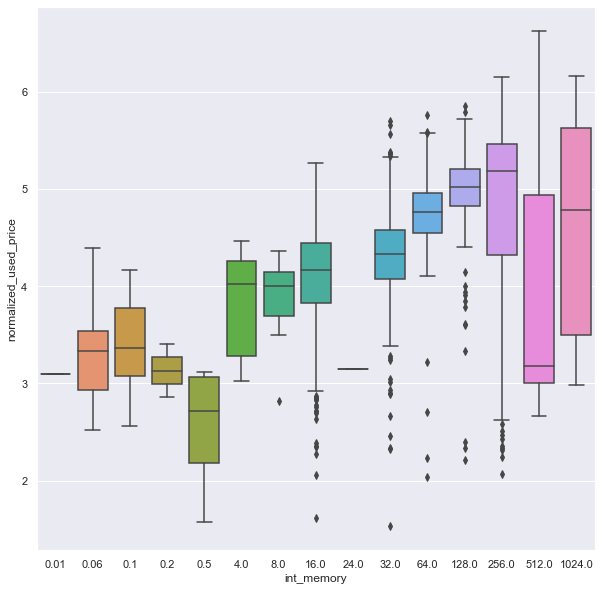

<IPython.core.display.Javascript object>

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x="int_memory", y="normalized_used_price")

There may be a general increase in price as memory increases, but it doesn't look conclusive.

It is also worth noting that memory is generally available in doubled values. It's probably a good idea to transform this variable into a log scale.

##### Let's look at exploratory data analysis for each of the numerical variables, seeing what type of distribution they follow.

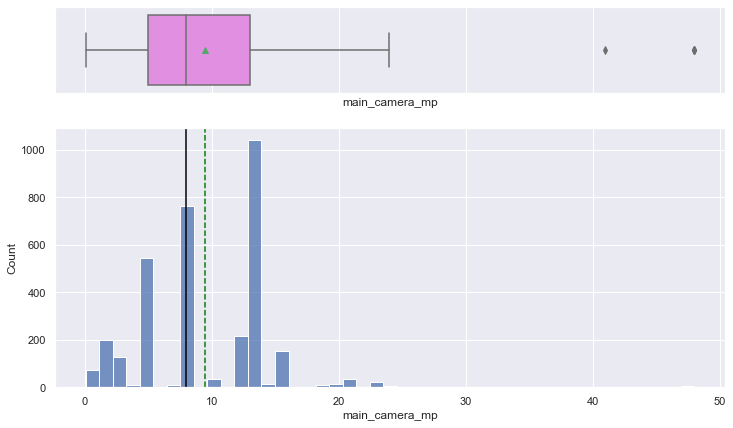

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "main_camera_mp")

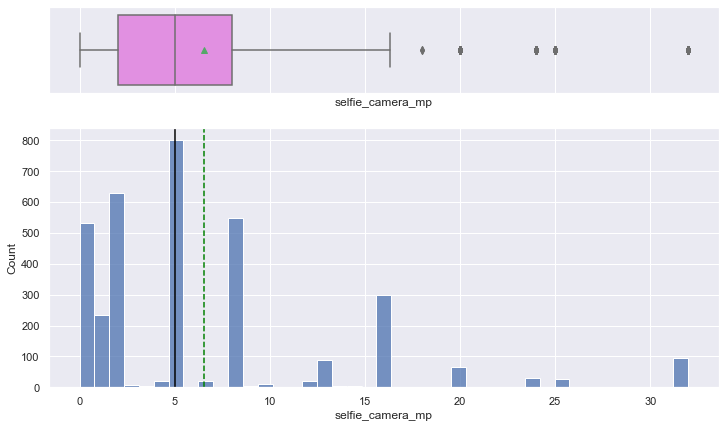

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "selfie_camera_mp")

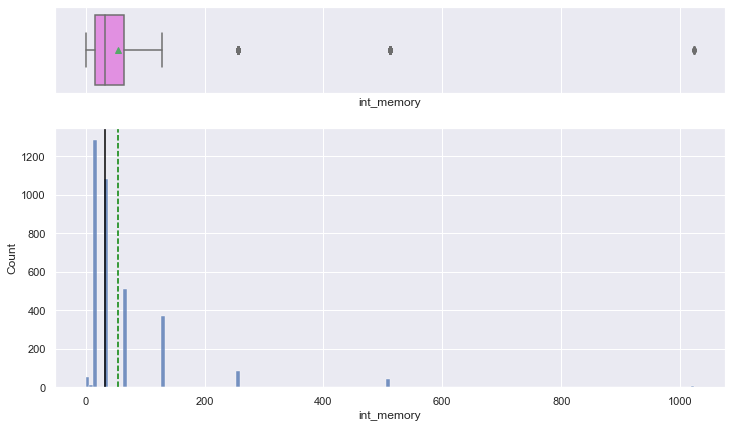

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "int_memory")

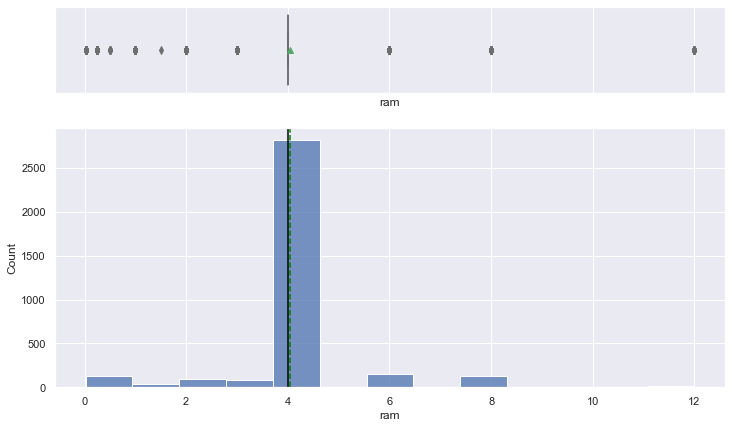

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "ram")

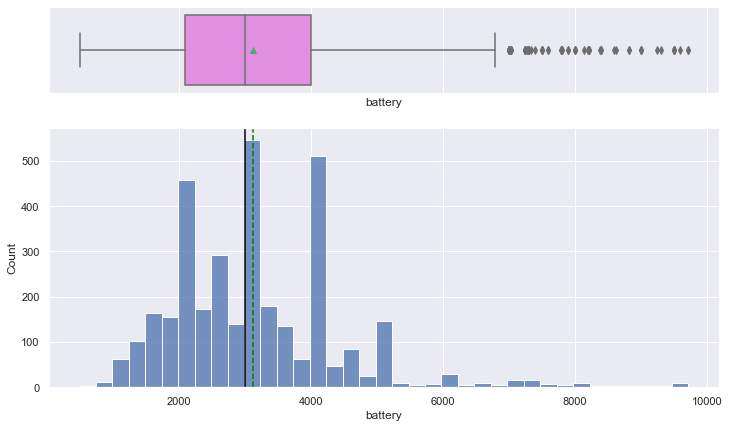

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "battery")

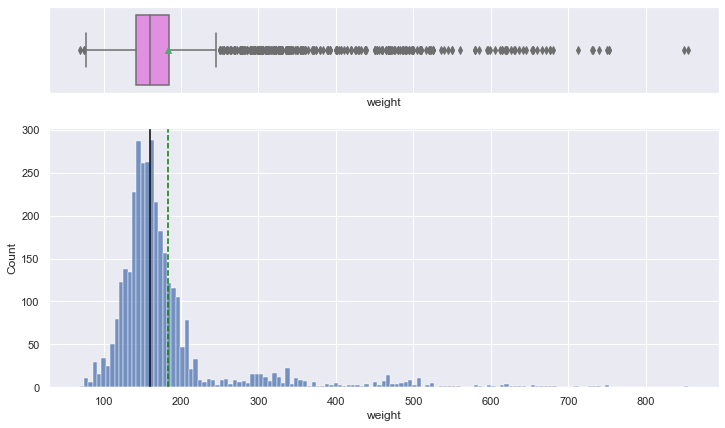

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "weight")

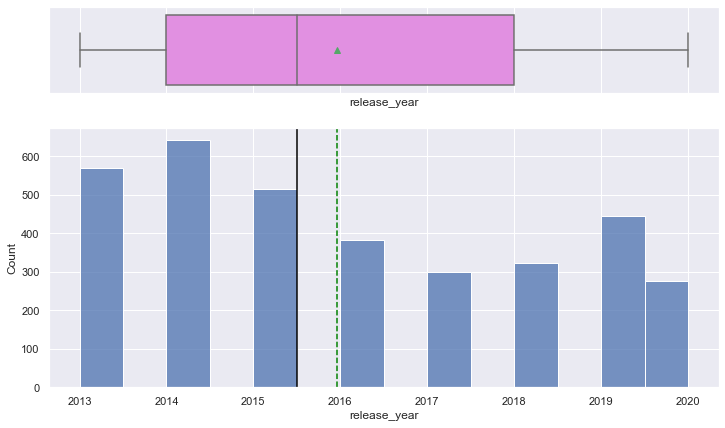

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df, "release_year")

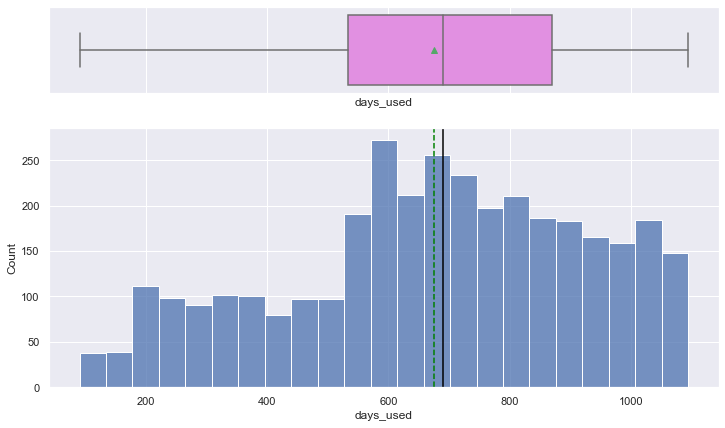

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df, "days_used")

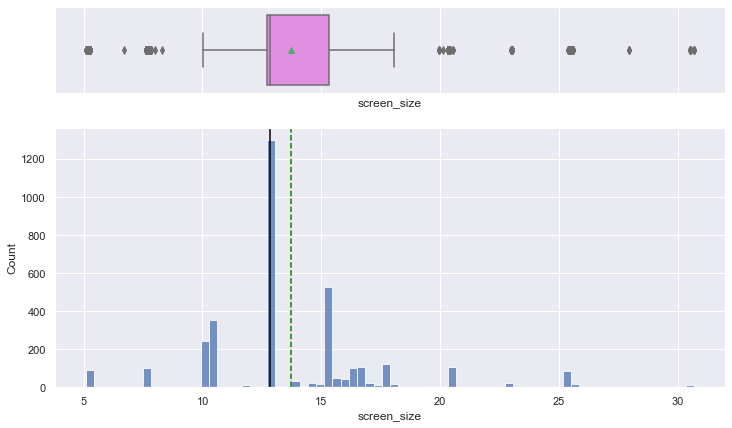

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "screen_size")

#### Observations:
- Most devices have ram as 4. Devices with other ram values are basically outliers. It may be worth either removing the variable altogether or binning into "less than 4", "equal to 4", "greater than 4".
- release_year should probably be converted to a "years since release" column so that we can get a numerical range of data that is more appropriately proportional.
- main_camera_mp, int_memory, battery, screen_size should get outlier treatment.
- weight should probably get transformed in a way that is not right skewed and appear like there are many outliers.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

##### Missing value treatment

The columns with missing values are:
main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight

There aren't many missing values in each column, and each of these columns are typically fixed numbers rather than ongoing decimals. Therefore, replacing them with medians seems like the best option. All of these variables already float data types, so we don't need to do data conversion before calculating medians.

In [38]:
medianFiller = lambda x: x.fillna(x.median()) if x.dtype == "float64" else x
df = df.apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

All columns now have no missing values.

In [40]:
# extra sanity check to confirm that there are no NaNs
pd.isna(df).sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

##### Processing columns:

We will convert the release_year column to a years_since_release column.

In [41]:
df["years_since_release"] = 2022 - df["release_year"]
df.drop("release_year", inplace=True, axis=1)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


<IPython.core.display.Javascript object>

##### Log Transformation:

It may make sense to transform int_memory, ram, main_camera_mp, selfie_camera_mp, weight variables into a log scale. Let's explore what they look like, starting with int_memory.

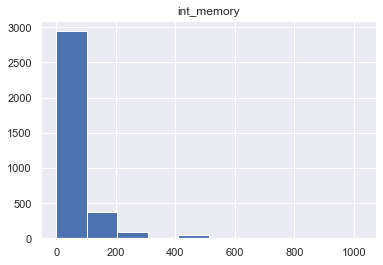

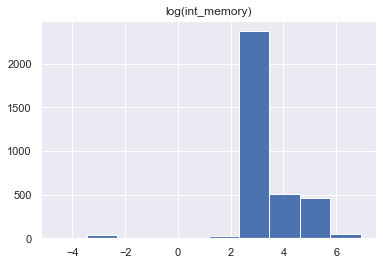

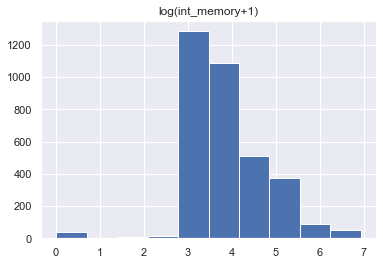

<IPython.core.display.Javascript object>

In [42]:
plt.hist(df["int_memory"])
plt.title("int_memory")
plt.show()
plt.hist(np.log(df["int_memory"]))
plt.title("log(int_memory)")
plt.show()
plt.hist(np.log(df["int_memory"] + 1))
plt.title("log(int_memory+1)")
plt.show()

int_memory seems to look closer to a normal distribution when we convert it to log(int_memory + 1).

Now let's observe ram.

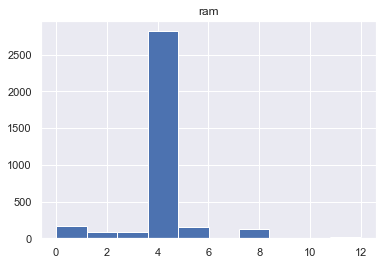

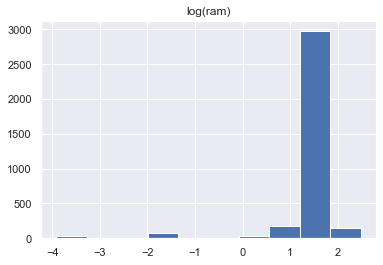

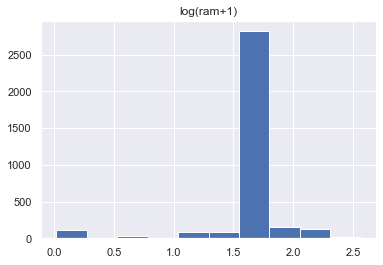

<IPython.core.display.Javascript object>

In [43]:
plt.hist(df["ram"])
plt.title("ram")
plt.show()
plt.hist(np.log(df["ram"]))
plt.title("log(ram)")
plt.show()
plt.hist(np.log(df["ram"] + 1))
plt.title("log(ram+1)")
plt.show()

ram is best to stay as is.

Now let's observe main_camera_mp.

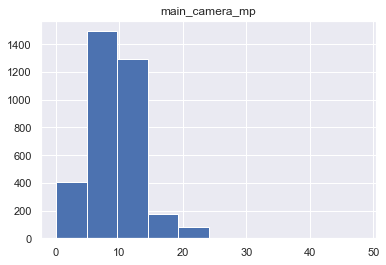

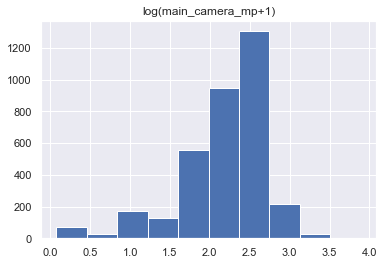

<IPython.core.display.Javascript object>

In [44]:
plt.hist(df["main_camera_mp"])
plt.title("main_camera_mp")
plt.show()
plt.hist(np.log(df["main_camera_mp"] + 1))
plt.title("log(main_camera_mp+1)")
plt.show()

main_camera_mp seems to look closer to a normal distribution when we convert it to log(main_camera_mp + 1).

Now let's observe selfie_camera_mp.

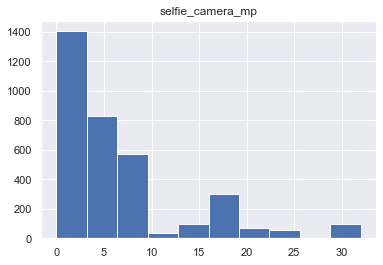

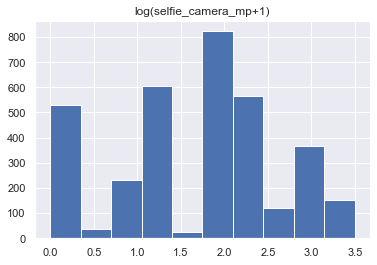

<IPython.core.display.Javascript object>

In [45]:
plt.hist(df["selfie_camera_mp"])
plt.title("selfie_camera_mp")
plt.show()
plt.hist(np.log(df["selfie_camera_mp"] + 1))
plt.title("log(selfie_camera_mp+1)")
plt.show()

selfie_camera_mp seems to look closer to a normal distribution when we convert it to log(selfie_camera_mp + 1).

Now, let's observe weight.

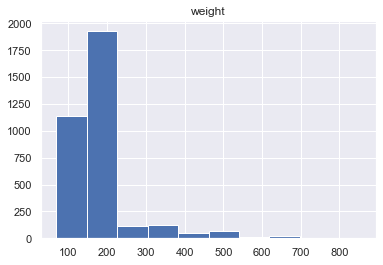

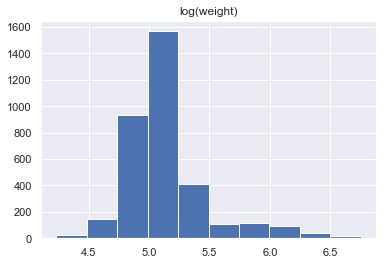

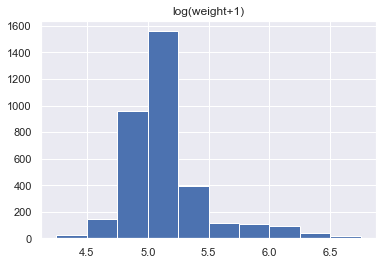

<IPython.core.display.Javascript object>

In [46]:
plt.hist(df["weight"])
plt.title("weight")
plt.show()
plt.hist(np.log(df["weight"]))
plt.title("log(weight)")
plt.show()
plt.hist(np.log(df["weight"] + 1))
plt.title("log(weight+1)")
plt.show()

weight seems to look closer to a normal distribution when we convert it to log(weight + 1).

Overall, we will convert int_memory, main_camera_mp, selfie_camera_mp, and weight to log(var + 1)

In [47]:
cols_to_log = ["int_memory", "main_camera_mp", "selfie_camera_mp", "weight"]
for col in cols_to_log:
    df[col + "_log"] = np.log(df[col] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [48]:
df.head()

,brand_name,os,screen_size,4g,5g,ram,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,int_memory_log,main_camera_mp_log,selfie_camera_mp_log,weight_log
0,Honor,Android,14.50,yes,no,3.0,3020.0,127,4.307572,4.715100,2,4.174387,2.639057,1.791759,4.990433
1,Honor,Android,17.30,yes,yes,8.0,4300.0,325,5.162097,5.519018,2,4.859812,2.639057,2.833213,5.365976
2,Honor,Android,16.69,yes,yes,8.0,4200.0,162,5.111084,5.884631,2,4.859812,2.639057,2.197225,5.365976
3,Honor,Android,25.50,yes,yes,6.0,7250.0,345,5.135387,5.630961,2,4.174387,2.639057,2.197225,6.175867
4,Honor,Android,15.32,yes,no,3.0,5000.0,293,4.389995,4.947837,2,4.174387,2.639057,2.197225,5.225747


<IPython.core.display.Javascript object>

##### Binning:
Given that there are so many rows where the ram is exactly 4.0, we will bin this variable into 3 bins: less than 4.0, equal to 4.0, greater than 4.0.

In [49]:
# From an earlier section, we saw that ram values are all whole numbers.
# To make a bin with just equal to 4.0, I'll make an interval for 3.9 to 4.1 to grab ram=4.0
binned_ram = pd.cut(df["ram"], [-np.inf, 3.9, 4.1, np.inf])
binned_ram.value_counts()

(3.9, 4.1]     2819
(-inf, 3.9]     333
(4.1, inf]      302
Name: ram, dtype: int64

<IPython.core.display.Javascript object>

In [50]:
df["ram_bin"] = pd.cut(
    df["ram"],
    [-np.inf, 3.9, 4.1, np.inf],
    labels=["Less than 4.0", "4.0", "More than 4.0"],
)
df.drop("ram", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [51]:
df.head()

,brand_name,os,screen_size,4g,5g,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,int_memory_log,main_camera_mp_log,selfie_camera_mp_log,weight_log,ram_bin
0,Honor,Android,14.50,yes,no,3020.0,127,4.307572,4.715100,2,4.174387,2.639057,1.791759,4.990433,Less than 4.0
1,Honor,Android,17.30,yes,yes,4300.0,325,5.162097,5.519018,2,4.859812,2.639057,2.833213,5.365976,More than 4.0
2,Honor,Android,16.69,yes,yes,4200.0,162,5.111084,5.884631,2,4.859812,2.639057,2.197225,5.365976,More than 4.0
3,Honor,Android,25.50,yes,yes,7250.0,345,5.135387,5.630961,2,4.174387,2.639057,2.197225,6.175867,More than 4.0
4,Honor,Android,15.32,yes,no,5000.0,293,4.389995,4.947837,2,4.174387,2.639057,2.197225,5.225747,Less than 4.0


<IPython.core.display.Javascript object>

##### Feature Engineering:

The remaining categorical variable is brand_name. One-hot encoding would likely not be feasible because there are 34 unique values. Let's explore this further.

In [52]:
df.brand_name.value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

There isn't really a good way to reduce the dimensionaltiy of the brand_name coiumn. There aren't clear groupings for each brand. A potential possibility is grouping the lesser known brands into the "Others" category but that may do more harm than good. It probably makes sense to simply remove the brand_name column altogether.

In [53]:
df.drop("brand_name", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [54]:
df.head()

,os,screen_size,4g,5g,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,int_memory_log,main_camera_mp_log,selfie_camera_mp_log,weight_log,ram_bin
0,Android,14.50,yes,no,3020.0,127,4.307572,4.715100,2,4.174387,2.639057,1.791759,4.990433,Less than 4.0
1,Android,17.30,yes,yes,4300.0,325,5.162097,5.519018,2,4.859812,2.639057,2.833213,5.365976,More than 4.0
2,Android,16.69,yes,yes,4200.0,162,5.111084,5.884631,2,4.859812,2.639057,2.197225,5.365976,More than 4.0
3,Android,25.50,yes,yes,7250.0,345,5.135387,5.630961,2,4.174387,2.639057,2.197225,6.175867,More than 4.0
4,Android,15.32,yes,no,5000.0,293,4.389995,4.947837,2,4.174387,2.639057,2.197225,5.225747,Less than 4.0


<IPython.core.display.Javascript object>

##### Outlier Treatment:

Earlier, we proposed that main_camera_mp, selfie_camera_mp, int_memory, battery, screen_size should get outlier treatment. However, everything except battery and screen_size got log transformed. So, let's see if those other variables should get outlier treatment.

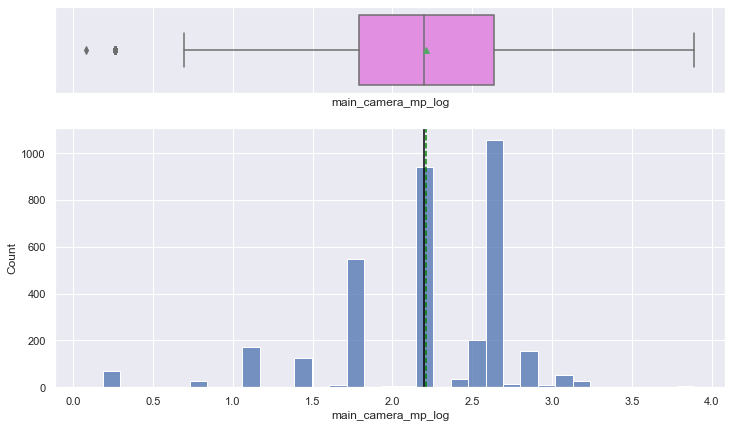

<IPython.core.display.Javascript object>

In [55]:
histogram_boxplot(df, "main_camera_mp_log")

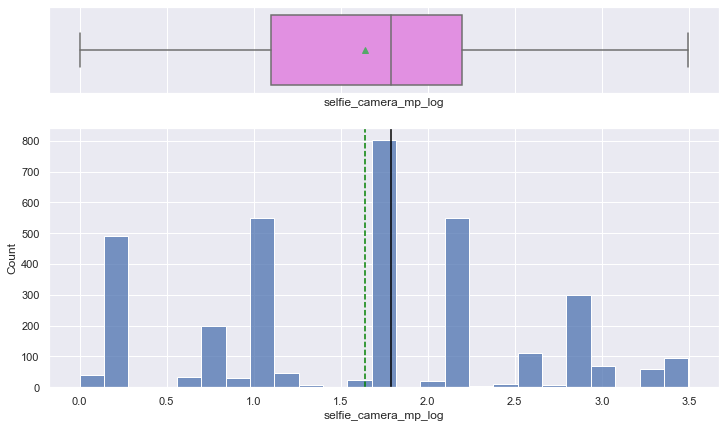

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(df, "selfie_camera_mp_log")

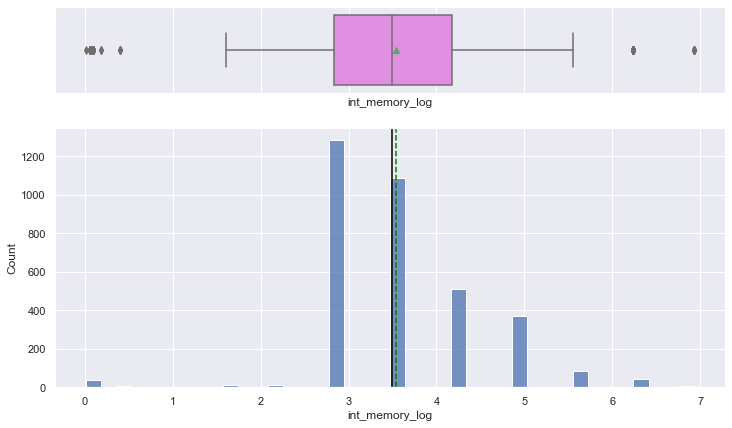

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(df, "int_memory_log")

The main_camera_mp and selfie_camera_mp variables don't have as many outliers, so I will keep those as is. int_memory_log has some outliers that seem like interesting data points that should stay.

I will only do outlier treatment on battery. I will handle this by making all values smaller than the lower whisker assigned to the lower whisker value, and all values larger than the upper whisker assigned to the upper whisker value.

First, let's further quantify if outlier treatment makes sense here.

In [58]:
def outlier_calcs(df, col):
    quartiles = np.quantile(df[col][df[col].notnull()], [0.25, 0.75])
    iqr = quartiles[1] - quartiles[0]
    lower_whisk = quartiles[0] - 1.5 * iqr
    upper_whisk = quartiles[1] + 1.5 * iqr

    print(
        "The Q1 and Q3 values of the",
        col,
        "column are",
        quartiles[0],
        "and",
        str(quartiles[1]),
        "respectively.",
    )
    print("Four times the interquartile range of the", col, "column is", iqr)
    print("The lower whisker of the", col, "column is", lower_whisk)
    print("The upper whisker of the", col, "column is", upper_whisk)

<IPython.core.display.Javascript object>

In [59]:
outlier_calcs(df, "battery")

The Q1 and Q3 values of the battery column are 2100.0 and 4000.0 respectively.
Four times the interquartile range of the battery column is 1900.0
The lower whisker of the battery column is -750.0
The upper whisker of the battery column is 6850.0


<IPython.core.display.Javascript object>

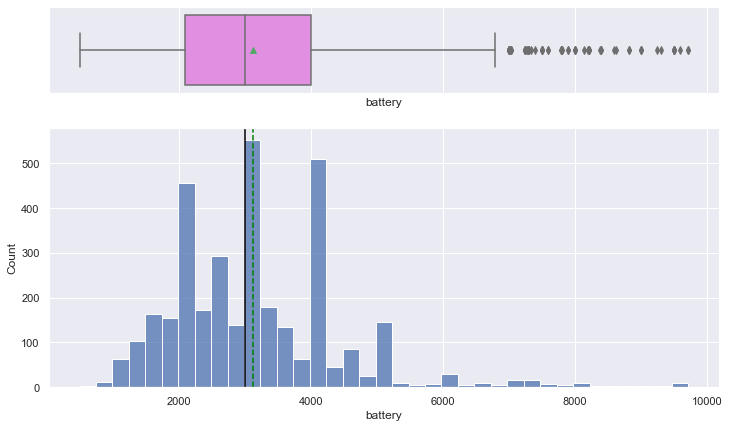

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, "battery")

The battery column has values above the upper whisker range, so we will do outlier treatment on the battery column.

Now let's do the same calculation for screen_size.

In [61]:
outlier_calcs(df, "screen_size")

The Q1 and Q3 values of the screen_size column are 12.7 and 15.34 respectively.
Four times the interquartile range of the screen_size column is 2.6400000000000006
The lower whisker of the screen_size column is 8.739999999999998
The upper whisker of the screen_size column is 19.3


<IPython.core.display.Javascript object>

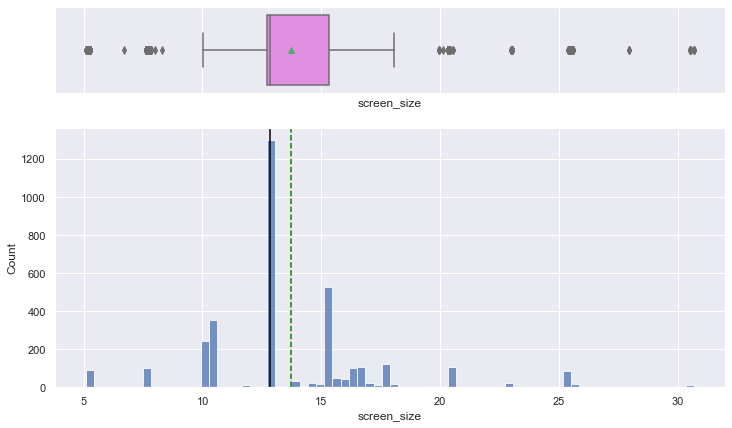

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, "screen_size")

The screen_size column has values both below the lower whisker range and above the upper whisker range, so we should do outlier treatment here too.

In [63]:
def treat_outliers(df, col):
    quartiles = np.quantile(df[col][df[col].notnull()], [0.25, 0.75])
    iqr = quartiles[1] - quartiles[0]
    lower_whisk = quartiles[0] - 1.5 * iqr
    upper_whisk = quartiles[1] + 1.5 * iqr
    df[col] = np.clip(df[col], lower_whisk, upper_whisk)


treat_outliers(df, "battery")
treat_outliers(df, "screen_size")

<IPython.core.display.Javascript object>

##### One-Hot Encoding:
Purposely making this the last step because keeping categorical variables as a single column may have been important for earlier data cleaning processes.
We can one-hot encode categorial values. We will do that for os, 4g, 5g, ram_bin columns.

In [64]:
df = pd.get_dummies(df, columns=["os", "4g", "5g", "ram_bin"], drop_first=True)
df.head()

,screen_size,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,int_memory_log,main_camera_mp_log,selfie_camera_mp_log,weight_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,ram_bin_4.0,ram_bin_More than 4.0
0,14.50,3020.0,127,4.307572,4.715100,2,4.174387,2.639057,1.791759,4.990433,0,0,0,1,0,0,0
1,17.30,4300.0,325,5.162097,5.519018,2,4.859812,2.639057,2.833213,5.365976,0,0,0,1,1,0,1
2,16.69,4200.0,162,5.111084,5.884631,2,4.859812,2.639057,2.197225,5.365976,0,0,0,1,1,0,1
3,19.30,6850.0,345,5.135387,5.630961,2,4.174387,2.639057,2.197225,6.175867,0,0,0,1,1,0,1
4,15.32,5000.0,293,4.389995,4.947837,2,4.174387,2.639057,2.197225,5.225747,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it. Let's do boxplots of all the variables.

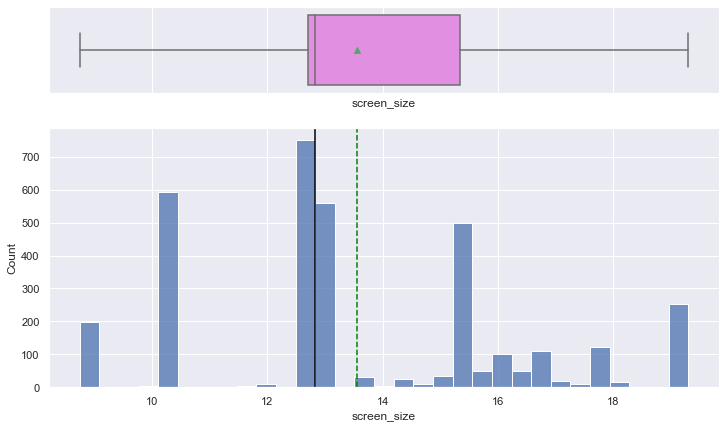

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(df, "screen_size")

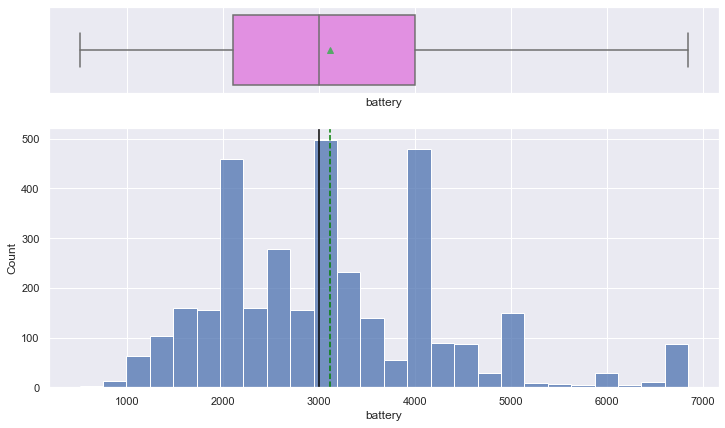

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(df, "battery")

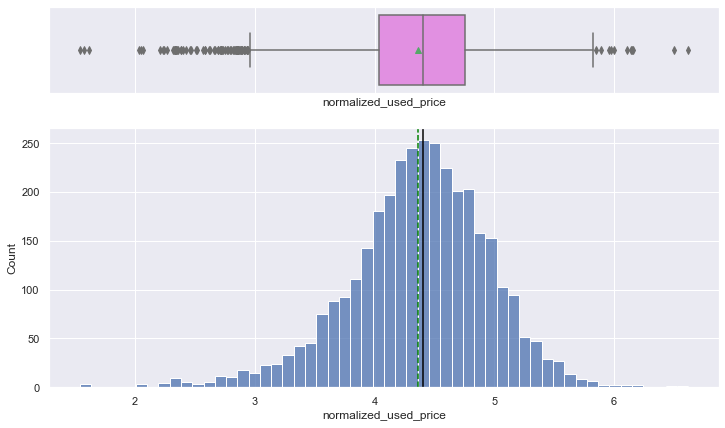

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(df, "normalized_used_price")

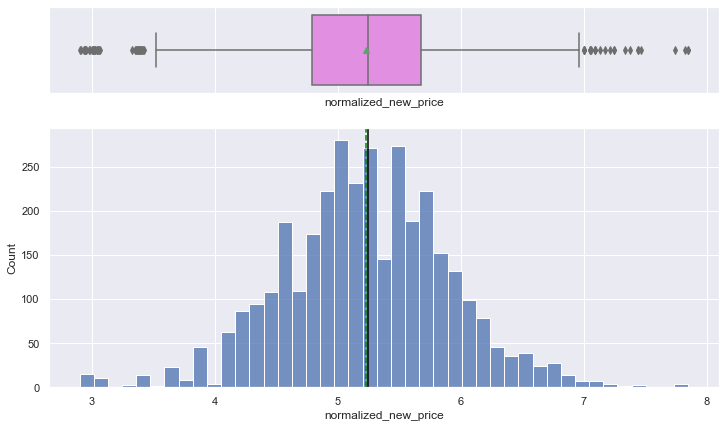

<IPython.core.display.Javascript object>

In [68]:
histogram_boxplot(df, "normalized_new_price")

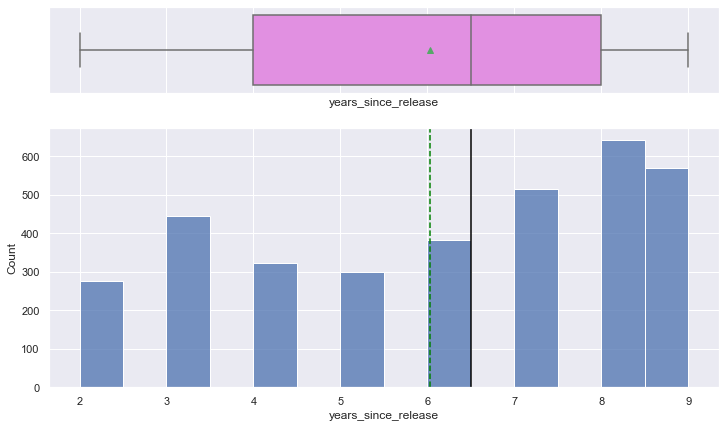

<IPython.core.display.Javascript object>

In [69]:
histogram_boxplot(df, "years_since_release")

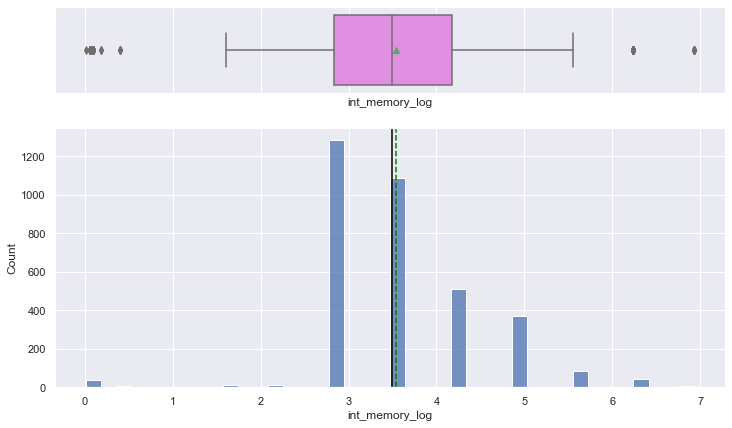

<IPython.core.display.Javascript object>

In [70]:
histogram_boxplot(df, "int_memory_log")

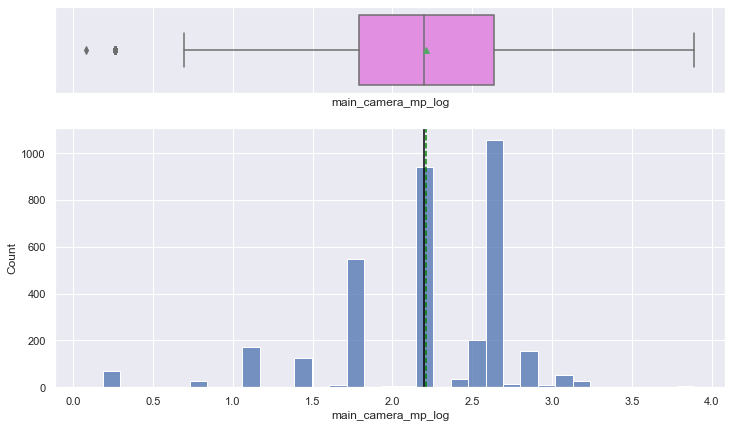

<IPython.core.display.Javascript object>

In [71]:
histogram_boxplot(df, "main_camera_mp_log")

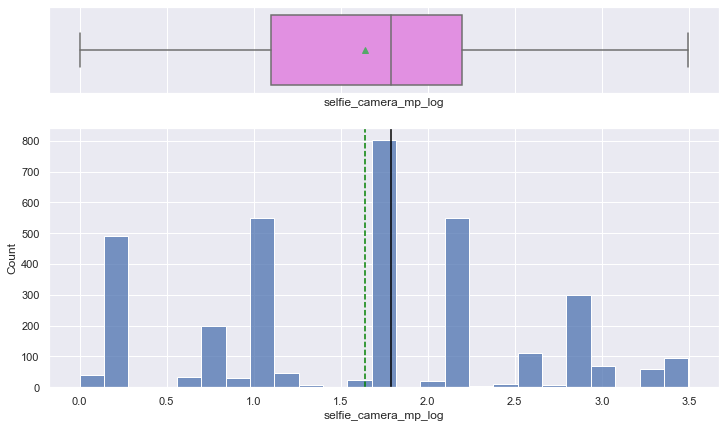

<IPython.core.display.Javascript object>

In [72]:
histogram_boxplot(df, "selfie_camera_mp_log")

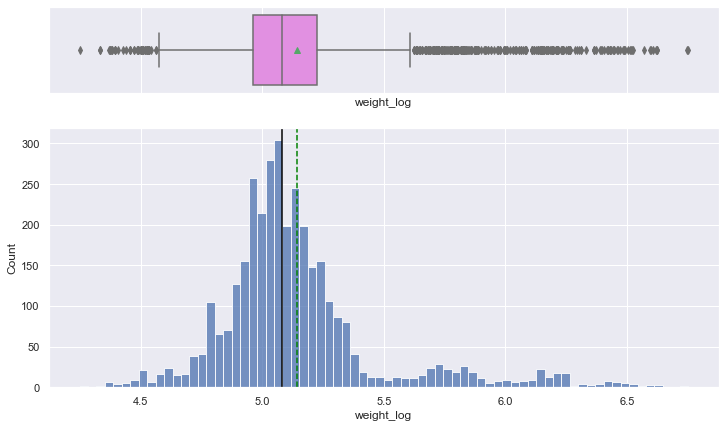

<IPython.core.display.Javascript object>

In [73]:
histogram_boxplot(df, "weight_log")

I am happy with how many data looks, so I will go into creating a linear regression model.

## Building a Linear Regression model

##### Split Data:

In [74]:
X = df.drop(["normalized_used_price"], axis=1)
X = sm.add_constant(X)
y = df[["normalized_used_price"]]

C:\Users\prani\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

## Model performance evaluation

In [76]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     821.0
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           17:36:56   Log-Likelihood:                 128.76
No. Observations:                   2417   AIC:                            -223.5
Df Residuals:                       2400   BIC:                            -125.1
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

##### Observations:

- The R-squared value tells us that our model can explain 84.6% of the variance in the training set.
- Assuming a level of significance value of 0.05, there are a couple variables whose p-values indicate that they are not significant.
- There may be multicollinearity embedded in the model too.

## Check Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

##### Test for multicollinearity:

In [77]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    689.108274
screen_size                5.211429
battery                    3.911589
days_used                  2.646443
normalized_new_price       2.758191
years_since_release        5.410400
int_memory_log             1.721248
main_camera_mp_log         2.616648
selfie_camera_mp_log       4.480747
weight_log                 5.100104
os_Others                  1.392824
os_Windows                 1.024344
os_iOS                     1.091384
4g_yes                     2.307066
5g_yes                     1.934702
ram_bin_4.0                2.467089
ram_bin_More than 4.0      3.256862
dtype: float64



<IPython.core.display.Javascript object>

Other than constant, no variables have a variance inflation factor of at least 10. That means that there are no signs of high multicollinearity. 

screen_size, years_since_release, and weight_log all have a variance inflation factor above 5, so one of them may be worth dropping. Let's remove/drop these columns one by one and observe the effect.

In [78]:
def multicoll_test(X_train, col):
    X_train_check = X_train.drop([col], axis=1)
    olsmod_1 = sm.OLS(y_train, X_train_check)
    olsres_1 = olsmod_1.fit()
    print("Results for the", col, "multicollinearity test:")
    print(
        "R-squared:",
        np.round(olsres_1.rsquared, 3),
        "\nAdjusted R-squared:",
        np.round(olsres_1.rsquared_adj, 3),
    )

<IPython.core.display.Javascript object>

In [79]:
multicoll_test(X_train, "screen_size")

Results for the screen_size multicollinearity test:
R-squared: 0.841 
Adjusted R-squared: 0.84


<IPython.core.display.Javascript object>

In [80]:
multicoll_test(X_train, "years_since_release")

Results for the years_since_release multicollinearity test:
R-squared: 0.845 
Adjusted R-squared: 0.844


<IPython.core.display.Javascript object>

In [81]:
multicoll_test(X_train, "weight_log")

Results for the weight_log multicollinearity test:
R-squared: 0.838 
Adjusted R-squared: 0.837


<IPython.core.display.Javascript object>

There was no change in Adjusted R-squared after dropping the years_since_release column. So, let's remove that column from our training set.

In [82]:
X_train = X_train.drop(["years_since_release"], axis=1)

<IPython.core.display.Javascript object>

In [83]:
olsmod2 = sm.OLS(y_train, X_train)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     870.0
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           17:36:56   Log-Likelihood:                 121.72
No. Observations:                   2417   AIC:                            -211.4
Df Residuals:                       2401   BIC:                            -118.8
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

We will measure variance inflation factors again.

In [84]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    687.130287
screen_size                5.107783
battery                    3.837774
days_used                  1.989934
normalized_new_price       2.548380
int_memory_log             1.706026
main_camera_mp_log         2.614386
selfie_camera_mp_log       3.671458
weight_log                 5.051966
os_Others                  1.392774
os_Windows                 1.024330
os_iOS                     1.082706
4g_yes                     2.043266
5g_yes                     1.923443
ram_bin_4.0                2.377274
ram_bin_More than 4.0      3.247626
dtype: float64



<IPython.core.display.Javascript object>

screen_size and weight_log are still above a variance inflation factor of 5. Let's remove/drop these columns one by one and observe the effect.

In [85]:
multicoll_test(X_train, "screen_size")

Results for the screen_size multicollinearity test:
R-squared: 0.84 
Adjusted R-squared: 0.839


<IPython.core.display.Javascript object>

In [86]:
multicoll_test(X_train, "weight_log")

Results for the weight_log multicollinearity test:
R-squared: 0.837 
Adjusted R-squared: 0.837


<IPython.core.display.Javascript object>

screen_size reduced the adjusted r-squared by a small amount, so let's remove that column.

In [87]:
X_train = X_train.drop(["screen_size"], axis=1)

<IPython.core.display.Javascript object>

In [88]:
olsmod3 = sm.OLS(y_train, X_train)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     899.2
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           17:36:57   Log-Likelihood:                 84.636
No. Observations:                   2417   AIC:                            -139.3
Df Residuals:                       2402   BIC:                            -52.42
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

We will measure variance inflation factors again.

In [89]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    564.075143
battery                    3.651621
days_used                  1.935270
normalized_new_price       2.547264
int_memory_log             1.704366
main_camera_mp_log         2.613716
selfie_camera_mp_log       3.534632
weight_log                 3.028537
os_Others                  1.351710
os_Windows                 1.023599
os_iOS                     1.079121
4g_yes                     2.043112
5g_yes                     1.923370
ram_bin_4.0                2.358172
ram_bin_More than 4.0      3.246792
dtype: float64



<IPython.core.display.Javascript object>

Variance inflation factor for all features are less than 5, so we can assume low multicollinearity and move on.

Assuming a level of significance value of 0.05, there are a couple variables whose p-values indicate that they are not significant.
We will go through a loop where we will drop the column with the highest p-value, build another model, and repeat until there are no columns with p-value > 0.05.

In [90]:
cols = X_train.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    x_train_aux = X_train[cols]
    model = sm.OLS(y_train, x_train_aux).fit()
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'days_used', 'normalized_new_price', 'int_memory_log', 'main_camera_mp_log', 'selfie_camera_mp_log', 'weight_log', '4g_yes', 'ram_bin_4.0', 'ram_bin_More than 4.0']


<IPython.core.display.Javascript object>

In [91]:
X_train = X_train[selected_features]

<IPython.core.display.Javascript object>

In [92]:
olsmod4 = sm.OLS(y_train, X_train)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1400.
Date:                   Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                           17:36:57   Log-Likelihood:                 83.634
No. Observations:                   2417   AIC:                            -147.3
Df Residuals:                       2407   BIC:                            -89.36
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

Now that we got a solid test for multicollinearity, let's move on to the rest of the linear regression assumptions.

##### Test for linearity and independence:

In [93]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsres4.fittedvalues  # predicted values
df_pred["Residuals"] = olsres4.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.774850,0.312638
1525,4.448399,4.687499,-0.239099
1128,4.315353,4.371617,-0.056265
3003,4.282068,4.324141,-0.042072
2907,4.456438,4.509097,-0.052659


<IPython.core.display.Javascript object>

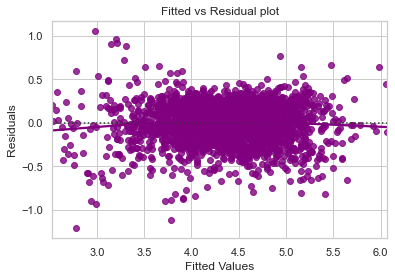

<IPython.core.display.Javascript object>

In [94]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There is no clear pattern, the data points seem to be randomly distributed.

##### Test for Normality:

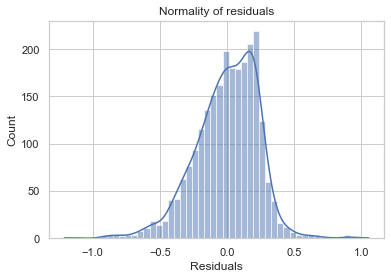

<IPython.core.display.Javascript object>

In [95]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

The residual terms generally are normally distributed.

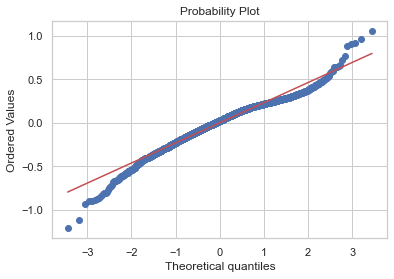

<IPython.core.display.Javascript object>

In [96]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most points lie on the straight line in the QQ plot.

In [97]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9729267358779907, pvalue=5.5124810438632615e-21)

<IPython.core.display.Javascript object>

The p-value from the Shapiro-Wilk test is les than 0.05, which means the residuals aren't normal. But, we'll still accept the distribution as close to normal based on the other tests we did here.

##### Test for Homoscedacity:

In [98]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

<IPython.core.display.Javascript object>

In [99]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.085222622606817), ('p-value', 0.07850518764791437)]

<IPython.core.display.Javascript object>

The p-value from the goldfeldquandt test is greater than 0.05, so we can conclude that the residuals are homoscedastic.

## Final Model Summary

Let's set up the testing set with the cleanup we did through the Linear Regression assumption testing

In [100]:
X_test = X_test[selected_features]

<IPython.core.display.Javascript object>

In [101]:
y_pred = olsres4.predict(X_test)

<IPython.core.display.Javascript object>

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [103]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [104]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres4, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233741,0.182532,0.839637,0.83897,NaN


<IPython.core.display.Javascript object>

In [105]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres4, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237205,0.183924,0.843999,0.842479,NaN


<IPython.core.display.Javascript object>

We are likely getting NaN for the MAPE calculation because there are some extreme values and some actual values close to zero. However, we can still conclude that our model works well. The RMSE, MAE, and R-squared values are comparable between the train set and test set. This means that the model is not overfitting, and the model can explain about 84% of the variance in the data.

## Actionable Insights and Recommendations

- Number of days used actually has negligible impact on the normalized used price. Even after using the device for 365 days, the price decreases a negligible amount (0.000081 coef * 365 = 0.000029 euros lower). This means that regardless of how much a device is used, the used price of the device will be constant. This likely explains why companies like Apple have fixed return values for devices of the same model - usage of the device has no impact on whether or not they are able to sell the device.
- Higher weight appears to increase the normalized used price of a device.
- RAM higher than 4.0 has a positive impact on the normalized used price, compared to RAM equal to 4.0.
- Internal memory, main camera mp, selfie camera mp and weight all have positive coefficients. So, as they increase, the used price also increases.
- The normalized new price also has a positive coefficient. This means that reviewing the new price of the device is a good way to estimate the tier that the used price of the device would be.
- If ReCell wants to make the most business, they should focus on selling devices with high memory, camera mp, and RAM. Prior usage of the device does not matter, so ReCell can prioritize selling these devices regardless of how much prior usage was.